<a href="https://colab.research.google.com/github/NhaBaodang/KT_AI/blob/main/hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
data="/content/drive/MyDrive/hoaAI/"

In [ ]:
# dùng ImageDataGenerator để tải và gắn nhãn dữ liệu. Chuẩn hóa dữ liệu và đồng bộ ảnh
# dùng flow_from_directory để chỉ định đường dẫn đến các thư mục huấn luyện và kiểm tra
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices


Found 146 images belonging to 5 classes.


{'hoa_hong': 0, 'hoa_lan': 1, 'hoa_mai': 2, 'hoa_sen': 3, 'hoa_van_tho': 4}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
#Chuyển đổi mảng dữ liệu hình ảnh đa chiều thành mảng một chiều
model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

model.summary()

NameError: ignored

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
5/5 [==============================] - 30s 4s/step - loss: 21.3846 - accuracy: 0.1712
Epoch 2/50
5/5 [==============================] - 3s 599ms/step - loss: 1.5580 - accuracy: 0.5000
Epoch 3/50
5/5 [==============================] - 2s 392ms/step - loss: 0.8867 - accuracy: 0.6849
Epoch 4/50
5/5 [==============================] - 2s 391ms/step - loss: 0.6529 - accuracy: 0.7877
Epoch 5/50
5/5 [==============================] - 2s 523ms/step - loss: 0.4416 - accuracy: 0.8082
Epoch 6/50
5/5 [==============================] - 2s 380ms/step - loss: 0.3941 - accuracy: 0.8562
Epoch 7/50
5/5 [==============================] - 3s 488ms/step - loss: 0.2973 - accuracy: 0.8904
Epoch 8/50
5/5 [==============================] - 2s 398ms/step - loss: 0.1909 - accuracy: 0.9589
Epoch 9/50
5/5 [==============================] - 2s 387ms/step - loss: 0.1903 - accuracy: 0.9315
Epoch 10/50
5/5 [==============================] - 2s 384ms/step - loss: 0.1389 - accuracy: 0.9315
Epoch 11/50
5/5 [===

In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.007093662861734629
Độ Chính Xác Trên Tập Kiểm Tra :  1.0


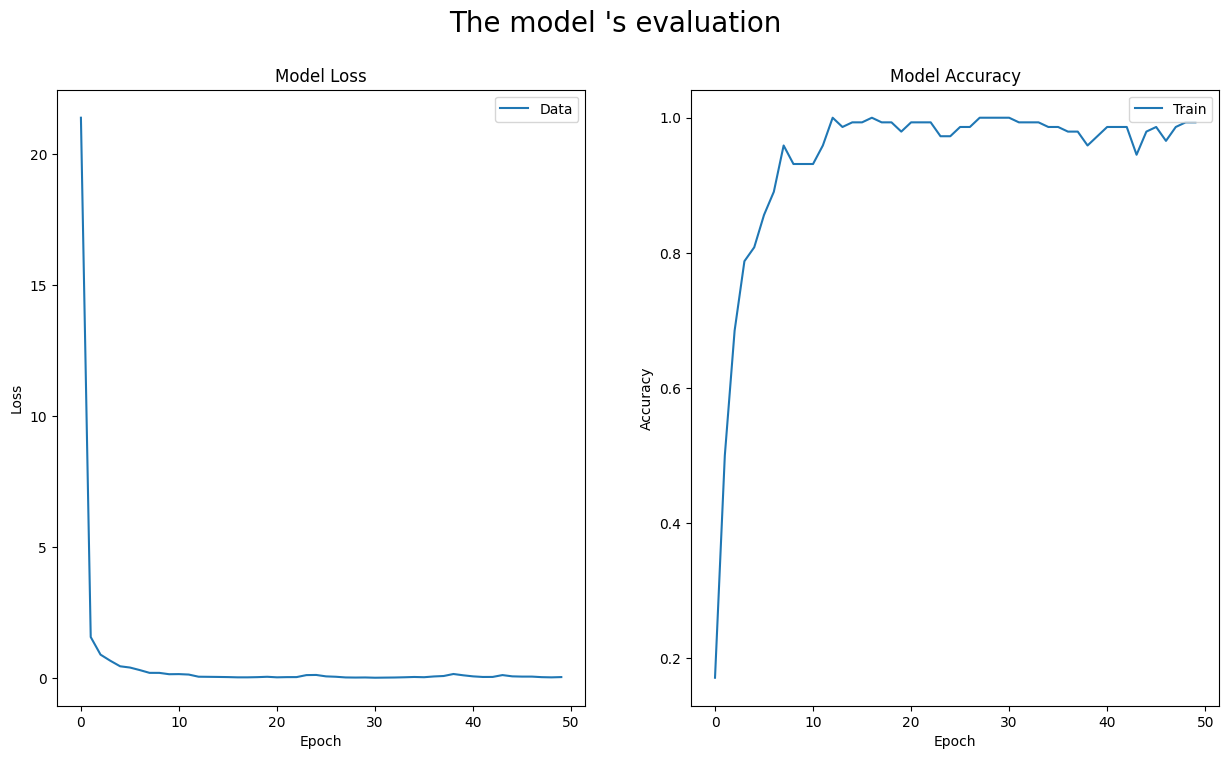

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model.save('/content/driver/MyDrive/hoa.h5')

In [ ]:
model_1 = load_model('/content/driver/MyDrive/hoa.h5')

  

1/1 [==============================] - 0s 250ms/step
Đây là hoa : hoa vạn thọthọ


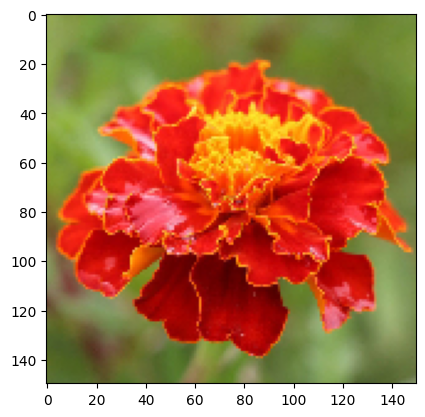

1/1 [==============================] - 0s 29ms/step
Đây là hoa : hoa sen


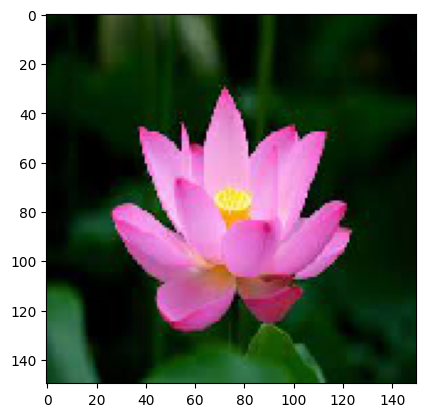

1/1 [==============================] - 0s 22ms/step
Đây là hoa : hoa mai


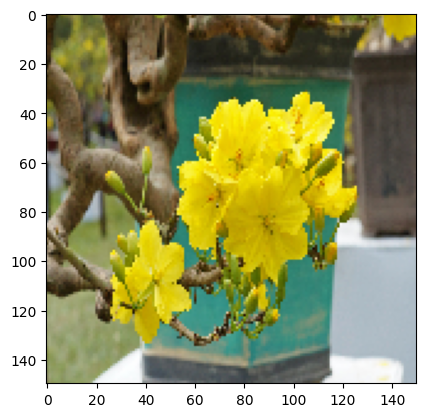

1/1 [==============================] - 0s 26ms/step
Đây là hoa : hoa hồng


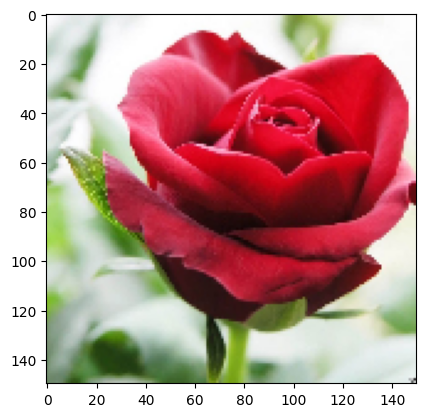

1/1 [==============================] - 0s 19ms/step
Đây là hoa : hoa lan


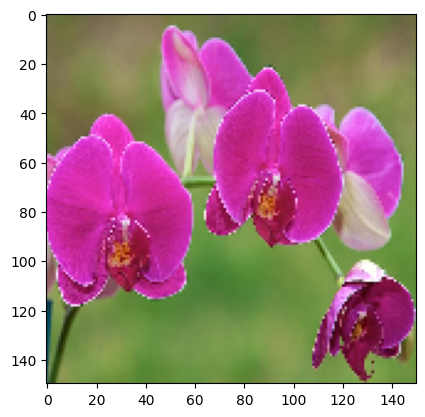

In [ ]:
folder='/content/drive/MyDrive/testhoa/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['hoa hồng', 'hoa lan', 'hoa mai', 'hoa sen', 'hoa vạn thọthọ']
  print('Đây là hoa : {}'.format(class_name[result]))
  plt.show()